In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
'''
def linktodata():
    link = input('Syötä datan linkki tähän')
    return link
def importdata():
    """Tuo datan käytettäväksi"""
    datalink = input('Syötä linkki tähän')
    
    if re.findall('xlsx$', datalink):   #varmistaa että linkki on xlsx muodossa.
        df = pd.read_excel(datalink)
    else:
        return 'Syötä tiedosto linkki xlsx-muodossa: '
    return df
'''
def myformat(x):
    return ('%.5f' % x).rstrip('0').rstrip('.')


def rivi1():
    return input('Syötä ensimmäinen rivi: ')


def rivi2():
    return input('Syötä toinen rivi: ')


class Rahasto:

    def __init__(self):
        datalink = input('Syötä linkki tähän:  ')
    
        try:
            if re.findall('.xlsx$', datalink):   #varmistaa että linkki on xlsx muodossa.
                self.data = pd.read_excel(datalink)
                self.dataisin = pd.read_excel(datalink,index_col='isin')
            else:
                raise ValueError('Linkki ei ole xlsx muotoinen!')
        except:
            raise ValueError('Linkki ei ole xlsx muotoinen!')
        data = self.data

    def colcross(self):
        """Antaa tiedot kahdelta pystyriviltä"""
        cc = data[[rivi1(),rivi2()]]
        return cc

    def list_of_companies(self):
        complist = []
        for x in data['company']:
            if x not in complist:
                complist.append(x)
        return complist

    def colinfo(self):
        """Näyttää kaikki pystyrivien otsikot"""
        #print([col for col in data.columns]) Selkeyttää Notebookkia
        return [col for col in data.columns]


    def find_stats_isin(self,isin=None):
        """Pyytää käyttäjältä tilinumeron ja palauttaa sitä vastaavan yrityksen taloustiedot"""
        if isin: var = isin
        else: var = input('Kirjoita rahaston isin: ')
        if re.findall('^[A-Za-z][A-Za-z][0-9]{10}',var):    #Varmistaa että ISIN on oikeassa muodossa
            return dataisin.loc[var]
        else:
            print('isin väärässä muodossa.')
            find_stats_isin()


    def top10(self,*args,plot=None):
        """Funktiolle voi ilmoittaa 2 parametria joista haluaa top10 tai antaa Terminaalin hoitaa "kysely" """
        def choice():
                x = input('Voit valita suodatuksen rahaston tai yrityksen mukaan\n(1)Rahasto\n(2)Yritys\nTai syötä oma suodatin: ')
                if x == '1': return 'fund_name_fi'
                elif x == '2': return 'company'
                elif x in self.colinfo(): return x
                else: 
                    raise ValueError('Syötä oikea suodatin')
                    choice()

        if len(args) != 2:
            y = input('Syötä kategoria jonka mukaan haluat top 10: ')
            ch = choice()
            if ch == 'company':
                comaver = []
                companies = a.list_of_companies()
                comp_fund_list = [x for x in data['company']]
                for x in companies:
                    count = comp_fund_list.count(x)
                    keskiarvot = sum(data.loc[data['company']==x][y].dropna())/count
                    comaver.append([x,keskiarvot])
                    comaverdataframe = pd.DataFrame(data=comaver)
                comaverdataframe.index = ['|' for x in range(len(comaverdataframe))]
                comaverdataframe.columns = ['COMPANY','%-return']
                #print(comaverdataframe.sort_values(by='%-return',ascending=False).head(10))
                comptop10 = comaverdataframe.sort_values(by='%-return',ascending=False).head(10)
            datatop10 = data[[ch,y]].sort_values(by=y,ascending=False).head(10)
            datatop10.index = ['|' for x in range(len(datatop10))]

            if plot:
                if ch != 'company':
                    tplot = datatop10
                    names = [x for x in tplot[ch]]
                    plt.bar(names,tplot[y])
                    plt.ylabel(y)
                    plt.xticks(rotation='vertical')
                    plt.subplots_adjust(bottom=0.5)
                    plt.show()
                    print(datatop10)
                    return datatop10
                if ch == 'company':
                    tplot = comptop10
                    names = [x for x in tplot['COMPANY']if type(x)==str]
                    plt.bar(names,tplot['%-return'])
                    plt.ylabel('%-return')
                    plt.xticks(rotation='vertical')
                    plt.subplots_adjust(bottom=0.5)
                    plt.show()
                    return comaverdataframe.sort_values(by='%-return',ascending=False).head(10)

            #print(datatop10)
            #print(comaverdataframe)
            return comaverdataframe.sort_values(by='%-return',ascending=False).head(10)
            
        else: 
              #Program jumps here if arguments were given, sorting by the later value
            print(data[[args[1],args[0]]].sort_values(by=args[0],ascending=False).head(10))
            
            if plot:
                tplot = data[[args[1],args[0]]].sort_values(by=args[0],ascending=False).head(10)
                names = [x for x in tplot[args[1]]]
                plt.bar(names,tplot[args[0]])
                plt.ylabel(args[0])
                plt.xticks(rotation='vertical')
                plt.subplots_adjust(bottom=0.5)
                plt.show()
            return data[[args[1],args[0]]].sort_values(by=args[0],ascending=False).head(10)

        
    def insights(self):
        val = input("Valitse operaatio\n(1)Keskiarvo ja mediaani sekä keskihajonta\n(2)Neljännes jako\n(3)Kaikki tunnusluvut:\n ")
        self.colinfo()
        kateg = input("Valitse kategoria josta haluat tiedot: \n")

        if val == '1':
            print(np.average(data[kateg].dropna()), '  Keskiarvo')
            print(np.median(data[kateg].dropna()), '  Mediaani')
        if val == '2':
            print(round(np.quantile(data[kateg].dropna(),0.25),5), '  alin 25%')
            print(round(np.quantile(data[kateg].dropna(),0.75),5), '  ylin 25%')
        if val == '3':
            print( round(np.average(data[kateg].dropna()),5),'  Keskiarvo\n',
            round(np.median(data[kateg].dropna()),5),'  Mediaani\n',
            round(np.quantile(data[kateg].dropna(),0.25),5),'  Alin 25%\n',
            round(np.quantile(data[kateg].dropna(),0.75),5),'  Ylin 25%\n',
            myformat(np.max((data[kateg].dropna()))),'  Suurin\n',
            myformat(np.min((data[kateg].dropna()))),' Pienin\n')

In [2]:
a = Rahasto()


Syötä linkki tähän:  http://taanila.fi/Rahastoraporttidata_201907.xlsx


In [3]:
data = a.data

In [4]:
a.colinfo()

['isin',
 'fund_name_fi',
 '120M_return',
 '60M_return',
 '36M_return',
 '12M_return',
 '6M_return',
 '3M_return',
 '1M_return',
 '12M_volatility',
 '60M_sharpe',
 '12M_sharpe',
 'duration',
 'subscriptionfee_fi',
 'redemptionfee_fi',
 'redemptionfee_fnte',
 'mgmt_plus_cust_fee_numeric',
 'managementfee_fnte',
 'ongoingcharges',
 'COUNTRY_FI',
 'fund_size',
 '1M_NET_SUBSCRIPTIONS',
 'numinvestors',
 'fund_start_date',
 'manager',
 'manager_start',
 'mininvestment_fi',
 'mininvestment_numeric',
 'mininvestment_currency',
 'mininvestment_month',
 'YTD_NET_SUBSCRIPTIONS',
 'company',
 'RR2009_class',
 'asset_class_order_id',
 'IS_NON_UCITS',
 'top_id',
 'date',
 'YTD_return',
 'FA_member']

Syötä kategoria jonka mukaan haluat top 10: 120M_return
Voit valita suodatuksen rahaston tai yrityksen mukaan
(1)Rahasto
(2)Yritys
Tai syötä oma suodatin: 2


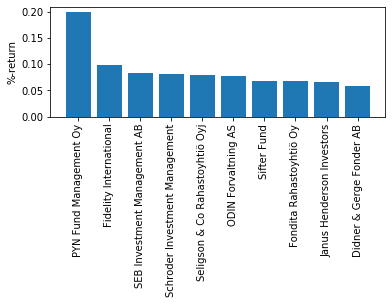

,COMPANY,%-return
|,PYN Fund Management Oy,0.199773
|,Fidelity International,0.097953
|,SEB Investment Management AB,0.082855
|,Schroder Investment Management,0.082069
|,Seligson & Co Rahastoyhtiö Oyj,0.080168
|,ODIN Forvaltning AS,0.077169
|,Sifter Fund,0.068893
|,Fondita Rahastoyhtiö Oy,0.068317
|,Janus Henderson Investors,0.066214
|,Didner & Gerge Fonder AB,0.059228


In [5]:
a.top10(plot=True)

In [6]:
a.top10()

Syötä kategoria jonka mukaan haluat top 10: 120M_return
Voit valita suodatuksen rahaston tai yrityksen mukaan
(1)Rahasto
(2)Yritys
Tai syötä oma suodatin: 2


,COMPANY,%-return
|,PYN Fund Management Oy,0.199773
|,Fidelity International,0.097953
|,SEB Investment Management AB,0.082855
|,Schroder Investment Management,0.082069
|,Seligson & Co Rahastoyhtiö Oyj,0.080168
|,ODIN Forvaltning AS,0.077169
|,Sifter Fund,0.068893
|,Fondita Rahastoyhtiö Oy,0.068317
|,Janus Henderson Investors,0.066214
|,Didner & Gerge Fonder AB,0.059228


In [7]:
a.insights()

Valitse operaatio
(1)Keskiarvo ja mediaani sekä keskihajonta
(2)Neljännes jako
(3)Kaikki tunnusluvut:
 3
Valitse kategoria josta haluat tiedot: 
120M_return
0.07706   Keskiarvo
 0.0762   Mediaani
 0.04968   alin 25%
 0.0762   50%
 0.10135   ylin 25%
 0.20363   Suurin
 -0.02731  Pienin



In [8]:
a.find_stats_isin('FI0008800016')

NameError: name 'dataisin' is not defined

In [9]:
dataisin = a.dataisin

In [10]:
a.find_stats_isin('FI0008800016')

fund_name_fi                                   Nordea Suomi
120M_return                                       0.0921765
60M_return                                        0.0744412
36M_return                                        0.0772088
12M_return                                       -0.0164025
6M_return                                         0.0419337
3M_return                                        -0.0243279
1M_return                                        -0.0208849
12M_volatility                                     0.129759
60M_sharpe                                          0.49904
12M_sharpe                                        -0.102637
duration                                                NaN
subscriptionfee_fi                                        0
redemptionfee_fi                                       0.01
redemptionfee_fnte                                      NaN
mgmt_plus_cust_fee_numeric                            0.014
managementfee_fnte                      

In [11]:
a.list_of_companies()

['Aktia Rahastoyhtiö Oy',
 'Danske Invest Rahastoyhtiö Oy',
 'eQ Rahastoyhtiö Oy',
 'Evli-Rahastoyhtiö Oy',
 'FIM Varainhoito Oy',
 'Fondita Rahastoyhtiö Oy',
 'Nordea Funds Oy',
 'OP-Rahastoyhtiö Oy',
 'SEB Investment Management AB',
 'Seligson & Co Rahastoyhtiö Oyj',
 'Sp-Rahastoyhtiö Oy',
 'Ålandsbanken Rahastoyhtiö',
 'Fourton Oy',
 'Alexandria Rahastoyhtiö Oy',
 'JOM Rahastoyhtiö',
 'PYN Fund Management Oy',
 nan,
 'EAB Rahastoyhtiö Oy',
 'Handelsbanken',
 'ODIN Forvaltning AS',
 'Taaleri Rahastoyhtiö Oy',
 'UB Rahastoyhtiö Oy',
 'Carnegie Asset Management',
 'Didner & Gerge Fonder AB',
 'Dividend House Oy',
 'Fidelity International',
 'AllianceBernstein Limited',
 'Amundi',
 'Aurejärvi Varanhoito Oy',
 'Carmignac Gestion',
 'Janus Henderson Investors',
 'JPMorgan Asset Management',
 'Jupiter Fund Management plc',
 'Mandatum Life Fund Management S.A.',
 'Pictet Asset Management',
 'Schroder Investment Management',
 'Sparinvest S.A.',
 'Standard Life Investments',
 'Union Bancaire 